# Pitch Deck Dataset Data Cleaning

## Import Libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

## Import Dataset

In [11]:
df = pd.read_csv('data/falory_clean_business_model.csv')

In [12]:
df[df['Name']=='Revolut'].head()

,Name,Description,Sector,Business,Customer,Round,AmountRaised,Investor,Year,Links,Location
38,Revolut,Revolut is a financial services company that p...,1,3,"B2B2C, B2C",Seed,$66M,VC,2015,"['https://www.revolut.com', 'https://www.crunc...","['London', 'England', 'United Kingdom']"


## Startups Customers

In [13]:
unique_cus = df['Customer'].unique()
print(unique_cus)

['B2C, B2B' 'B2B' 'C2C' 'B2C' 'B2B2C' 'B2B, B2C' 'B2G, B2B' 'B2C, B2B2C'
 'B2B2C, B2C' 'B2G, B2B2C' 'B2B, B2G' 'B2B, B2C, B2B2C' 'B2G' 'C2C, B2B2C'
 'B2C, B2B, B2B2C' 'B2C, C2C' 'Proptech'
 'Venture Capital, Tech, Software, Hardware, Consumer' 'Healthcare' 'VC'
 'Tech' 'FinTech']


In [14]:
mapping_dict = {
    'B2C': 'B2C',
    'B2C, B2B' : 'B2C, B2B',
    'B2C, C2C': 'B2C, C2C',
    'B2C, B2B2C': 'B2C, B2B2C',
    'B2C, B2B, B2B2C': 'B2C, B2B, B2B2C',
    'C2C, B2B2C': 'C2C, B2B2C',
    'B2C, C2C': 'B2C, C2C',
    'B2B': 'B2B',
    'B2B2C': 'B2B',
    'B2B2C, B2C': 'B2B2C, B2C',
    'B2B, B2C': 'B2B, B2C',
    'B2B, B2G': 'B2B, B2G',
    'B2B, B2C, B2B2C': 'B2B, B2C, B2B2C',
    'B2B, B2G': 'B2B, B2G',
    'C2C': 'C2C',
    'B2G': 'B2G',
    'B2G, B2B': 'B2G, B2B',
    'B2G, B2B2C': 'B2G, B2B2C',
    'Proptech': 'B2C',
    'Venture Capital, Tech, Software, Hardware, Consumer': 'B2B',
    'Healthcare': 'B2B',
    'VC': 'B2B',
    'Tech': 'B2B',
    'FinTech': 'B2B'
}

# Assuming you have a DataFrame called df and a 'Customer' column that needs to be replaced.
df['Customer'] = df['Customer'].map(mapping_dict)

unique_cus = df['Customer'].unique()
print(unique_cus)

['B2C, B2B' 'B2B' 'C2C' 'B2C' 'B2B, B2C' 'B2G, B2B' 'B2C, B2B2C'
 'B2B2C, B2C' 'B2G, B2B2C' 'B2B, B2G' 'B2B, B2C, B2B2C' 'B2G' 'C2C, B2B2C'
 'B2C, B2B, B2B2C' 'B2C, C2C']


In [15]:
customer_dummies  = df['Customer'].str.get_dummies(', ').add_prefix('customer_')
df = pd.concat([df, customer_dummies], axis=1)

In [16]:
df.head()

,Name,Description,Sector,Business,Customer,Round,AmountRaised,Investor,Year,Links,Location,customer_B2B,customer_B2B2C,customer_B2C,customer_B2G,customer_C2C
0,Airbnb,Airbnb is an online marketplace for people to ...,2,1,"B2C, B2B",Seed,$600K,"VC, Angel Investors",2008,"['https://airbnb.com/', 'https://www.crunchbas...","['San Francisco', 'California', 'United States']",1,0,1,0,0
1,Alan,Alan is a platform that uses technology to mak...,1,3,B2B,Series C,$54M,VC,2020,"['https://alan.com/', 'https://www.crunchbase....","['Paris', 'Ile-de-France', 'France']",1,0,0,0,0
2,Apptopia,Apptopia serves the mobile industry with an ar...,0,1,B2B,Series A,$1.46M,VC,2018,"['http://www.apptopia.com/', 'https://www.crun...","['Boston', 'Massachusetts', 'United States']",1,0,0,0,0
3,Beatdapp,Beatdapp provides real-time tracking of media ...,3,0,B2B,Seed,$2.4M,VC,2019,"['https://beatdapp.com/', 'https://www.crunchb...","['Vancouver', 'British Columbia', 'Canada']",1,0,0,0,0
4,Bind,"Bind provides personalized, cost-transparent a...",5,1,"B2C, B2B",Series A,$60M,VC,2018,"['https://www.yourbind.com/', 'https://www.cru...","['Minneapolis', 'Minnesota', 'United States']",1,0,1,0,0


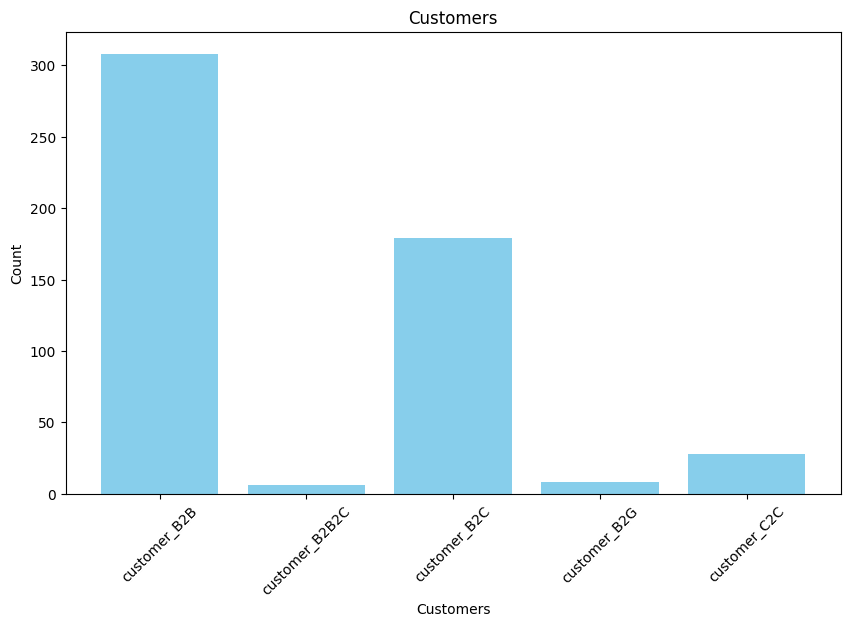

In [17]:
customer_type_sums = df[['customer_B2B', 'customer_B2B2C', 'customer_B2C', 'customer_B2G', 'customer_C2C']].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(customer_type_sums.index, customer_type_sums.values, color='skyblue')
plt.title('Customers')
plt.xlabel('Customers')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

In [18]:
df.drop('Customer', axis=1, inplace=True)

### save cleaned dataset

In [19]:
# Save the updated DataFrame to a new CSV file or overwrite the original one
df.to_csv('data/falory_clean_customer.csv', index=False)